# Creating Dataframes

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"a":[4,5,6],"b":[7,8,9],"c":[10,11,12]},index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df = pd.DataFrame([[4,7,10],[5,8,11],[6,9,12]],index = [1,2,3],columns = ['a','b','c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df = pd.DataFrame({"a":[4,5,6],"b":[7,8,9],"c":[10,11,12]}, index = pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)], names = ['n','v']))
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

# Reshaping Data

In [ ]:
pd.melt(df)
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df2 = (pd.melt(df).rename(columns = {'variable':'var','value':'val'}).query('val >= 200'))
df2.pivot(columns='var',values = 'val')
pd.concat([df,df2])

,a,b,c,var,val
1,4.0,7.0,10.0,NaN,NaN
2,5.0,8.0,11.0,NaN,NaN
3,6.0,9.0,12.0,NaN,NaN


In [ ]:
pd.concat([df,df2])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
pd.concat([df,df2])

,a,b,c,var,val
1,4.0,7.0,10.0,NaN,NaN
2,5.0,8.0,11.0,NaN,NaN
3,6.0,9.0,12.0,NaN,NaN


In [ ]:
df.drop(columns='b')

,a,c
1,4,10
2,5,11
3,6,12


In [ ]:
df.drop(columns='c')

,a,b
1,4,7
2,5,8
3,6,9


In [ ]:
df.rename(columns={'a':'A','b':'B','c':'C'})

,A,B,C
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.sort_values('a')

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.sort_values('c')

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.sort_values('a', ascending = False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [ ]:
df.sort_index()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.reset_index()

,index,a,b,c
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


# Method chaining

In [ ]:
xyz = (pd.melt(df).rename(columns = {'variable':'var','value':'val'}).query('val >= 200'))
xyz

,var,val


# Subset Variables - Rows


In [ ]:
df=pd.DataFrame({"a":[4,5,6],"b":[7,8,9],"c":[10,11,12]},index = [1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df[df.a > 5]

,a,b,c
3,6,9,12


In [ ]:
df.drop_duplicates()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.sample(frac = 0.5)

,a,b,c
1,4,7,10
2,5,8,11


In [ ]:
df.nlargest(1,'b')

,a,b,c
3,6,9,12


In [ ]:
df.nsmallest(1,'b')

,a,b,c
1,4,7,10


In [ ]:
df.head(2)

,a,b,c
1,4,7,10
2,5,8,11


In [ ]:
df.tail(2)

,a,b,c
2,5,8,11
3,6,9,12


In [ ]:
df[['a','c']]

,a,c
1,4,10
2,5,11
3,6,12


# Subset Variables - Columns

In [ ]:
df[['a','c']]

,a,c
1,4,10
2,5,11
3,6,12


In [ ]:
df['a']

1    4
2    5
3    6
Name: a, dtype: int64

In [ ]:
df.filter(regex='regex')

""
1
2
3


# Using Query

In [ ]:
df.query('a>5')

,a,b,c
3,6,9,12


In [ ]:
df.query('a>4' and 'b>6')

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.loc[:]


,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.iloc[:]

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.loc[:,'x2':'x3']

""
1
2
3


In [ ]:
df.loc[df['a'] > 4 , ['a','b']]

,a,b
2,5,8
3,6,9


In [ ]:
df.iat[1,1]

8

In [ ]:
df.at[1,'a']

4

# Summarizing Data

In [ ]:
df['a'].value_counts()

4    1
5    1
6    1
Name: a, dtype: int64

In [ ]:
len(df)

3

In [ ]:
df.shape

(3, 3)

In [ ]:
df['c'].nunique()

3

In [ ]:
df.describe()

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


In [ ]:
df.sum()

a    15
b    24
c    33
dtype: int64

In [ ]:
df.count()

a    3
b    3
c    3
dtype: int64

In [ ]:
df.median()

a     5.0
b     8.0
c    11.0
dtype: float64

In [ ]:
df.quantile([0.25,0.50])


,a,b,c
0.25,4.5,7.5,10.5
0.50,5.0,8.0,11.0


In [ ]:
df.apply(sum)

a    15
b    24
c    33
dtype: int64

In [ ]:
df.min()

a     4
b     7
c    10
dtype: int64

In [ ]:
df.max()

a     6
b     9
c    12
dtype: int64

In [ ]:
df.mean()

a     5.0
b     8.0
c    11.0
dtype: float64

In [ ]:
df.var()

a    1.0
b    1.0
c    1.0
dtype: float64

In [ ]:
df.std()

a    1.0
b    1.0
c    1.0
dtype: float64

# Group Data

In [ ]:
df.groupby(by='b')

In [ ]:
df.shift(1)

,a,b,c
1,NaN,NaN,NaN
2,4.0,7.0,10.0
3,5.0,8.0,11.0


In [ ]:
df.rank(method = 'dense')

,a,b,c
1,1.0,1.0,1.0
2,2.0,2.0,2.0
3,3.0,3.0,3.0


In [ ]:
df.rank(method = 'min')

,a,b,c
1,1.0,1.0,1.0
2,2.0,2.0,2.0
3,3.0,3.0,3.0


In [ ]:
df.rank(pct=True)

,a,b,c
1,0.333333,0.333333,0.333333
2,0.666667,0.666667,0.666667
3,1.000000,1.000000,1.000000


In [ ]:
df.rank(method ='first')

,a,b,c
1,1.0,1.0,1.0
2,2.0,2.0,2.0
3,3.0,3.0,3.0


In [ ]:
df.shift(-1)

,a,b,c
1,5.0,8.0,11.0
2,6.0,9.0,12.0
3,NaN,NaN,NaN


In [ ]:
df.cumsum()

,a,b,c
1,4,7,10
2,9,15,21
3,15,24,33


In [ ]:
df.cummax()

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [ ]:
df.cummin()

,a,b,c
1,4,7,10
2,4,7,10
3,4,7,10


In [ ]:
df.cumprod()

,a,b,c
1,4,7,10
2,20,56,110
3,120,504,1320


# Make new columns

In [ ]:
df.assign(Area=lambda df:df.b*df.c)

,a,b,c,Area
1,4,7,10,70
2,5,8,11,88
3,6,9,12,108


In [ ]:
df['Volume'] = df.a*df.b*df.c
df

,a,b,c,Volume
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


In [ ]:
pd.qcut(df.a , 2 , labels = False)

1    0
2    0
3    1
Name: a, dtype: int64

In [ ]:
df.max(axis=1)

1    280
2    440
3    648
dtype: int64

In [ ]:
df.min(axis=1)

1    4
2    5
3    6
dtype: int64

In [ ]:
df.clip(lower=-10,upper=10)

,a,b,c,Volume
1,4,7,10,10
2,5,8,10,10
3,6,9,10,10


In [ ]:
df.abs()

,a,b,c,Volume
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


#  Handling Missing Data

In [ ]:
df.dropna()

,a,b,c,Volume
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


In [ ]:
df.fillna(2)

,a,b,c,Volume
1,4,7,10,280
2,5,8,11,440
3,6,9,12,648


# Combine Data set

In [ ]:
adf = pd.DataFrame({'a' : [1,2,3],'b' : [4,5,6],'c' : [7,8,9]})
adf

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
bdf = pd.DataFrame({'a' : [10,11,12], 'b' : [13,14,15], 'c' : [16,17,18]})
bdf

,a,b,c
0,10,13,16
1,11,14,17
2,12,15,18


In [ ]:
pd.merge(adf,bdf, how='left',on='a')

,a,b_x,c_x,b_y,c_y
0,1,4,7,NaN,NaN
1,2,5,8,NaN,NaN
2,3,6,9,NaN,NaN


In [ ]:
pd.merge(adf,bdf,how='right', on = 'a')

,a,b_x,c_x,b_y,c_y
0,10,NaN,NaN,13,16
1,11,NaN,NaN,14,17
2,12,NaN,NaN,15,18


In [ ]:
pd.merge(adf,bdf,how='inner',on = 'a')

,a,b_x,c_x,b_y,c_y


In [ ]:
pd.merge(adf,bdf,how='outer',on='a')

,a,b_x,c_x,b_y,c_y
0,1,4.0,7.0,NaN,NaN
1,2,5.0,8.0,NaN,NaN
2,3,6.0,9.0,NaN,NaN
3,10,NaN,NaN,13.0,16.0
4,11,NaN,NaN,14.0,17.0
5,12,NaN,NaN,15.0,18.0


In [ ]:
adf[adf.a.isin(bdf.a)]

,a,b,c


In [ ]:
adf[~adf.a.isin(bdf.a)]

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
ddf = pd.DataFrame({'a' : [10,11,12], 'b' : [13,14,15], 'c' : [16,17,18]})
ddf

,a,b,c
0,10,13,16
1,11,14,17
2,12,15,18


In [ ]:
cdf = pd.DataFrame({'b' : [13,14,15], 'c' : [16,17,18], 'd' : [19,20,21]})
cdf

,b,c,d
0,13,16,19
1,14,17,20
2,15,18,21


In [ ]:
pd.merge(cdf,ddf)

,b,c,d,a
0,13,16,19,10
1,14,17,20,11
2,15,18,21,12


In [ ]:
pd.merge(cdf,ddf,how='outer')

,b,c,d,a
0,13,16,19,10
1,14,17,20,11
2,15,18,21,12


In [ ]:
pd.merge(cdf,ddf,how='outer',indicator = True)

,b,c,d,a,_merge
0,13,16,19,10,both
1,14,17,20,11,both
2,15,18,21,12,both


# Windows

In [ ]:
df.expanding()

Expanding [min_periods=1,center=False,axis=0,method=single]

In [ ]:
df.rolling(2)

Rolling [window=2,center=False,axis=0,method=single]

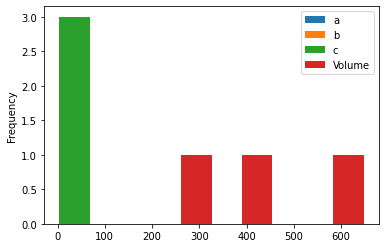

In [ ]:
df.plot.hist()

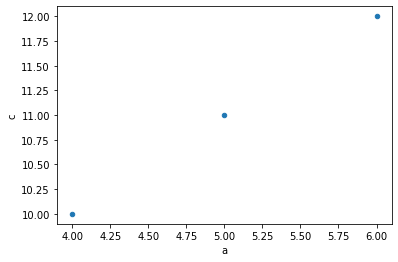

In [ ]:
df.plot.scatter(x='a',y='c')